In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
#eliminate warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#open survey_25.csv
df = pd.read_csv('survey_47.csv')
#remove first 4 columns, and first 2 rows
df = df.iloc[1:,4:]
#remove RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail, ExternalReference	LocationLatitude	LocationLongitude	DistributionChannel	UserLanguage	Q_RecaptchaScore	Instruction	
df = df.drop(['RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage','Q_RecaptchaScore','Instruction'],axis=1)

new_cols = []
for col in df.columns:
    #remove empty spaces
    col = col.strip()
    new_cols.append(col)

df.columns = new_cols

#TEMPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP
#remove first row
df = df.iloc[1:,:]

#remove samples where "Q5" is nan
print(df.shape)
df = df.dropna(subset=['Q5'])
print('post exclusion of nan in Q5',df.shape)

df


(47, 285)
post exclusion of nan in Q5 (43, 285)


,Progress,Duration (in seconds),Finished,Q5,Q5_5_TEXT,Q9,Q8,1,2,3,...,293,294,295,296,297,298,300,301,Q732,Q733
2,100,2074,True,Robotics in Academia,NaN,5,Assistant Professor,Pedestrian density,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,287,True,Urban Planning,NaN,2,PhD Candidate in Computer Science,NaN,NaN,NaN,...,NaN,NaN,Zoning laws and regulation,NaN,NaN,"Existence of shade (e.g., trees)",NaN,NaN,MATT,mwf62@cornell.edu
4,100,294,True,Robotics in Academia,NaN,3,PhD,NaN,NaN,Sidewalk / Surface roughness,...,Zoning laws and regulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100,597,True,Robotics in Industry,NaN,9,Research Scientist in Robotics,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pedestrian flow,NaN,mattia.racca@naverlabs.com
6,100,363,True,Robotics in Industry,NaN,8,UX/HRI Designer in Robotics,NaN,NaN,NaN,...,NaN,NaN,NaN,Zoning laws and regulation,NaN,NaN,NaN,NaN,NaN,NaN
7,100,701,True,Robotics in Industry,NaN,5,Senior Scientist (Human-Robot Interaction),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bike lane availability,GPS signal strength,NaN,NaN,tommaso.colombino@naverlabs.com
8,100,391,True,Robotics in Academia,NaN,10,Full Professor Psychology of HCI,NaN,NaN,Sidewalk width,...,Bicycle traffic,Vehicle traffic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100,506,True,Robotics in Academia,NaN,23,Professor in Language and Technology Interaction,Pedestrian density,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm afraid people's responses will crucially d...,NaN
10,100,415,True,Robotics in Academia,NaN,3,Researcher in Robotics,NaN,"Density of street furniture (e.g. garbage, pol...",NaN,...,NaN,NaN,Existence of detailed digital maps of the area,NaN,Bike lane availability,NaN,NaN,Pedestrian flow,NaN,NaN
11,100,887,True,Robotics in Academia,NaN,28,Full Professor in Control and Automation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Em alguns casos, não havia equilíbrio entre as...",yes


# Demographics

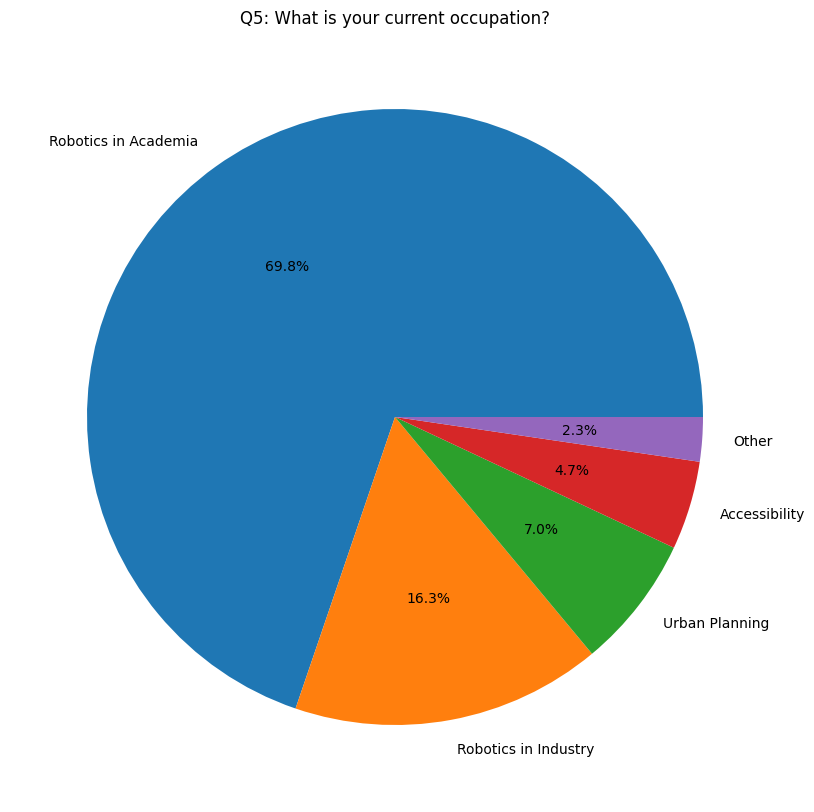

In [3]:
# get answers from Q5 and count values. plot as pie chart
answers = df['Q5'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(answers,labels=answers.index,autopct='%1.1f%%')
plt.title('Q5: What is your current occupation?')                               
plt.show()


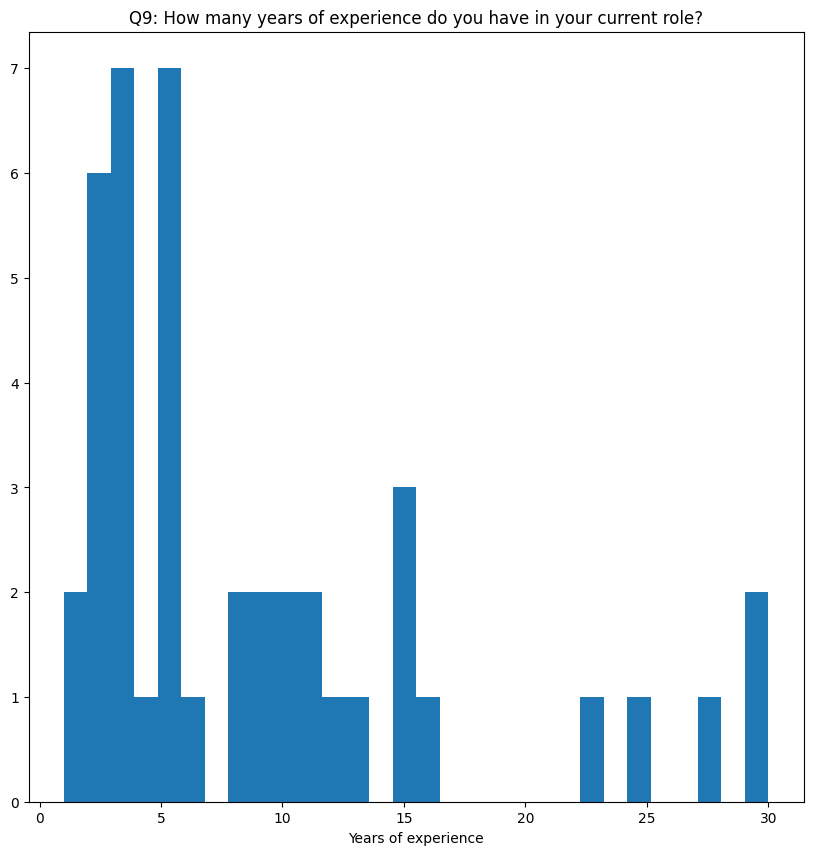

In [4]:
#get range of years of experience, get average and plot as histogram
df['Q9'] = df['Q9'].replace('30+ years', '30')
df['Q9'] = df['Q9'].replace('30+', '30')
df['Q9'] = df['Q9'].replace('1+', '1')
df['Q9'] = df['Q9'].replace('2 (since completion of PhD)', '2')


years_exp = df['Q9'].astype(int)
plt.figure(figsize=(10,10))
plt.hist(years_exp,bins=30)
plt.title('Q9: How many years of experience do you have in your current role?')
plt.xlabel('Years of experience')

plt.show()

# Contingency Table - Preferences

In [5]:
#dictionary of correspondence, just for reference
import json 
#open combinations.ods
df2 = pd.read_excel('combinations_updated.ods', engine='odf')
#make dictionary where every row number +1 is the key, and the value is the combination (columns 1 and 2, as a list)
correspondence = {}
for i in range(len(df2)):
    correspondence[i+1] = [df2.iloc[i,0],df2.iloc[i,1]]
print(len(correspondence))
#save as csv
df_correspondence = pd.DataFrame(correspondence).transpose()
#print(df_correspondence)
df_correspondence.to_csv('df_correspondence.csv')

# Convert and write JSON object to file
with open("correspondence.json", "w") as outfile: 
    json.dump(correspondence, outfile)

correspondence



351


{1: ['Sidewalk width', 'Pedestrian density'],
 2: ['Sidewalk width', 'Density of street furniture (e.g. garbage, poles)'],
 3: ['Sidewalk width', 'Sidewalk / Surface roughness'],
 4: ['Sidewalk width', 'Surface condition'],
 5: ['Sidewalk width',
  'Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)'],
 6: ['Sidewalk width', 'Slope gradient (i.e. elevation change)'],
 7: ['Sidewalk width', 'Proximity to charging stations'],
 8: ['Sidewalk width', 'Local attitudes towards robots'],
 9: ['Sidewalk width', 'Curb ramp availability'],
 10: ['Sidewalk width',
  'Scaffolding (temporary construction structure above ground)'],
 11: ['Sidewalk width', 'Weather conditions'],
 12: ['Sidewalk width',
  'Crowd dynamics - purpose with which people navigate in the space'],
 13: ['Sidewalk width', 'Traffic management systems'],
 14: ['Sidewalk width', 'Surveillance coverage (CCTV)'],
 15: ['Sidewalk width', 'Zoning laws and regulation'],
 16: ['Sidewalk width', 'Bike lane availability'],
 17: 

In [6]:
#now, correspond every indicator to a number

indicator_list = ['Sidewalk width','Pedestrian density','Density of street furniture (e.g. garbage, poles)','Sidewalk / Surface roughness',
                  'Surface condition','Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)',
                  'Slope gradient (i.e. elevation change)','Proximity to charging stations',
                  'Local attitudes towards robots','Curb ramp availability','Weather conditions',
                  'Crowd dynamics - purpose with which people navigate in the space','Traffic management systems',
                  'Surveillance coverage (CCTV)','Zoning laws and regulation','Bike lane availability','Street lighting',
                  'Existence of shade (e.g., trees)','GPS signal strength','Pedestrian flow','Bicycle traffic','Vehicle traffic',
                  'Existence of detailed digital maps of the area','Intersection safety']

#dictionary of indicators
indicators = {}
for i in range(len(indicator_list)):
    indicators[i] = indicator_list[i]

indicators

{0: 'Sidewalk width',
 1: 'Pedestrian density',
 2: 'Density of street furniture (e.g. garbage, poles)',
 3: 'Sidewalk / Surface roughness',
 4: 'Surface condition',
 5: 'Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)',
 6: 'Slope gradient (i.e. elevation change)',
 7: 'Proximity to charging stations',
 8: 'Local attitudes towards robots',
 9: 'Curb ramp availability',
 10: 'Weather conditions',
 11: 'Crowd dynamics - purpose with which people navigate in the space',
 12: 'Traffic management systems',
 13: 'Surveillance coverage (CCTV)',
 14: 'Zoning laws and regulation',
 15: 'Bike lane availability',
 16: 'Street lighting',
 17: 'Existence of shade (e.g., trees)',
 18: 'GPS signal strength',
 19: 'Pedestrian flow',
 20: 'Bicycle traffic',
 21: 'Vehicle traffic',
 22: 'Existence of detailed digital maps of the area',
 23: 'Intersection safety'}

In [7]:
#now, go through the correspondence dictionary and look at the columns of the df. save in a new df only the columns that exist, and save the columns with no correspondence in a list
new_df = pd.DataFrame(np.nan, index=range(len(df)), columns=[])
print(new_df.shape)
no_correspondence = []
not_indicator = []
count = 0
#go through keys
for key in correspondence.keys():
    #if the key is in the columns of the df
    
    if str(key) in df.columns:
        #add the column to the new df
        new_df[key] = pd.concat([df[str(key)]],axis=1)
        count = count + 1
    #if the key is not in the columns of the df
    else:
        #add the key to the list of no correspondence        
        if correspondence[key][0] not in indicators.values() or correspondence[key][1] not in indicators.values():
            #print(correspondence[key], 'NOT IN INDICATORS')
            if correspondence[key][0]  not in indicators.values():
                not_indicator.append(correspondence[key][0])
            elif correspondence[key][1]  not in indicators.values():
                not_indicator.append(correspondence[key][1])
        else:
            no_correspondence.append(correspondence[key])
            #add empty column to new df
            new_df[key] = np.nan
        #print(key)


print(new_df.shape)
print(len(not_indicator))
print(len(no_correspondence))
print(count)
no_correspondence


(43, 0)
(43, 276)
75
0
276


[]

[3 4 5 6 7 8]


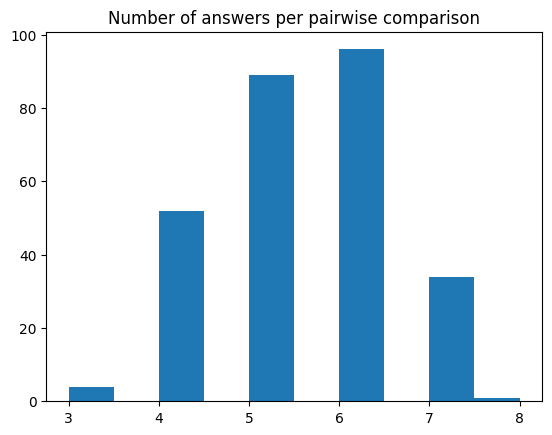

In [8]:
#now, get some data: for each column, count number of answers (not nan), save in list and make histogram
answers = []
for i in range(len(new_df.columns)):
    answers.append(new_df[new_df.columns[i]].count())

print(np.unique(answers))
plt.hist(answers)
plt.title('Number of answers per pairwise comparison')
plt.show()

In [9]:
#now, get contingency table for each column: 
#each column, get the 2 indicators it represents through correspondence dictionary
#then, count answers for that column, and for each answer, count how many times each indicator appears
#fill out the corresponding cell in the contingency table

contingency_table = np.zeros((len(indicators),len(indicators)))
contingency_table = pd.DataFrame(contingency_table)
#columns and rows are indicators
contingency_table.columns = indicators.values()
contingency_table.index = indicators.values()
#print(contingency_table.shape)


for i in range(len(new_df.columns)):
    #get the 2 indicators
    ind1 = correspondence[new_df.columns[i]][0]
    ind2 = correspondence[new_df.columns[i]][1]
    #print(ind1,ind2)
    #count answers for that column
    count = new_df[new_df.columns[i]].count()
    #print(count)
    value_counts = new_df[new_df.columns[i]].value_counts()
    #print(value_counts)
    for value in value_counts.index:
        #eliminate empty space at end of string for value
        count_value = value_counts[value]   
        value = value.rstrip()
        #print(count_value,count)
        if value == ind1:
            contingency_table.loc[ind1,ind2] = count_value/count
        elif value == ind2:
            contingency_table.loc[ind2,ind1] = count_value/count
        else:
            print('UH OH')
            print(value_counts)
    #print(contingency_table.loc[ind2,ind1])
    #print(contingency_table.loc[ind1,ind2])

In [10]:
contingency_table

,Sidewalk width,Pedestrian density,"Density of street furniture (e.g. garbage, poles)",Sidewalk / Surface roughness,Surface condition,"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",Slope gradient (i.e. elevation change),Proximity to charging stations,Local attitudes towards robots,Curb ramp availability,...,Zoning laws and regulation,Bike lane availability,Street lighting,"Existence of shade (e.g., trees)",GPS signal strength,Pedestrian flow,Bicycle traffic,Vehicle traffic,Existence of detailed digital maps of the area,Intersection safety
Sidewalk width,0.000000,0.000000,0.166667,0.571429,0.571429,0.750000,0.666667,1.000000,0.833333,0.400000,...,0.857143,1.000000,0.750000,0.833333,0.666667,0.200000,0.800000,1.000000,1.000000,0.428571
Pedestrian density,1.000000,0.000000,0.600000,1.000000,0.500000,0.750000,0.833333,1.000000,0.800000,0.800000,...,0.800000,0.800000,1.000000,0.833333,1.000000,0.600000,1.000000,1.000000,0.857143,0.750000
"Density of street furniture (e.g. garbage, poles)",0.833333,0.400000,0.000000,0.666667,0.166667,0.428571,0.800000,1.000000,0.400000,0.500000,...,0.800000,0.833333,0.750000,1.000000,0.750000,0.500000,0.750000,0.800000,0.600000,0.500000
Sidewalk / Surface roughness,0.428571,0.000000,0.333333,0.000000,0.000000,0.600000,0.400000,0.333333,0.666667,0.333333,...,1.000000,0.800000,0.750000,0.857143,0.600000,0.500000,0.500000,0.571429,0.142857,0.400000
Surface condition,0.428571,0.500000,0.833333,1.000000,0.000000,0.714286,0.666667,1.000000,0.500000,0.750000,...,0.833333,0.833333,0.800000,0.800000,0.714286,0.142857,1.000000,0.833333,0.750000,0.500000
"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",0.250000,0.250000,0.571429,0.400000,0.285714,0.000000,0.750000,0.833333,0.600000,0.400000,...,0.857143,1.000000,1.000000,1.000000,0.200000,0.250000,0.750000,0.750000,0.666667,0.600000
Slope gradient (i.e. elevation change),0.333333,0.166667,0.200000,0.600000,0.333333,0.250000,0.000000,0.800000,0.200000,0.500000,...,0.400000,0.857143,0.666667,1.000000,0.500000,0.250000,0.800000,0.200000,0.142857,0.400000
Proximity to charging stations,0.000000,0.000000,0.000000,0.666667,0.000000,0.166667,0.200000,0.000000,0.166667,0.200000,...,0.142857,0.571429,0.500000,0.666667,0.333333,0.200000,0.250000,0.333333,0.400000,0.000000
Local attitudes towards robots,0.166667,0.200000,0.600000,0.333333,0.500000,0.400000,0.800000,0.833333,0.000000,0.750000,...,0.500000,0.833333,0.333333,0.833333,0.400000,0.500000,0.600000,0.714286,0.400000,0.200000
Curb ramp availability,0.600000,0.200000,0.500000,0.666667,0.250000,0.600000,0.500000,0.800000,0.250000,0.000000,...,0.428571,0.857143,0.666667,1.000000,0.666667,0.400000,0.500000,0.400000,1.000000,0.000000


In [11]:
#ccheck if the value of any pair of the same indicators is 1. print if yes, make it one if not
for i in range(len(indicators)):
    for j in range(len(indicators)):
        if i == j:
            if contingency_table.iloc[i,j] == 1:
                print(indicators[i],indicators[j])
            else:
                contingency_table.iloc[i,j] = 1

#save contingency table to csv
contingency_table.to_csv('contingency_table.csv', index=True)


# Contingency Table - AHP (not used)

In [21]:
#open contingency table
contingency_table = pd.read_csv('contingency_table.csv', index_col=0)

In [22]:
#for each indicator combination, get the value in the contingency table corresponding to the highest value. e.g. contingency[i,j] or contingency[j,i], save in list

highest_values = []
for i in range(len(contingency_table)):
    for j in range(i+1,len(contingency_table)):
        if contingency_table.iloc[i,j] > contingency_table.iloc[j,i]:
            highest_values.append(contingency_table.iloc[i,j])
        else:
            highest_values.append(contingency_table.iloc[j,i])
print(len(highest_values))
print(np.unique(highest_values))
#count zeros
print(highest_values.count(0))
#remove zeros
nonzero_highest_values = [x for x in highest_values if x != 0]
print(np.mean(nonzero_highest_values))

276
[0.         0.5        0.6        0.66666667 0.75       0.8
 0.83333333 1.        ]
7
0.7845105328376702


In [23]:
#now, transform each value on a number (from 1 to len(highest_values)) 
new_highest_values = {}
highest_values = np.unique(highest_values)[1:]
print(highest_values)
for i in range(len(highest_values)):
    if highest_values[i] not in new_highest_values.keys():
        scale = len(new_highest_values)+1
        #print(highest_values[i],scale)
        #key should be 4 decimal places to avoid floating point errors
        new_highest_values[round(highest_values[i],4)] = float(scale)

        new_highest_values[round(1 - highest_values[i],4)] = float(1/scale)
    #highest_values[i] = new_highest_values[highest_values[i]]
print(new_highest_values)

contingency_table_copy = contingency_table.copy()
#now, go to contingency_table and replace each value with the corresponding number, and the complementary number (e.g. i,j and j, i in 1/new_value) 
for i in range(len(contingency_table_copy)):
    for j in range(i+1,len(contingency_table_copy)):
        #if i smaller than j
        if i < j:
            #print(contingency_table_copy.iloc[i,j],contingency_table_copy.iloc[j,i])
            #print(i,j)
            #print(new_highest_values[round(contingency_table_copy.iloc[i,j],4)],new_highest_values[round(contingency_table_copy.iloc[j,i],4)])
            contingency_table_copy.iloc[i,j] = new_highest_values[round(contingency_table_copy.iloc[i,j],4)]
            contingency_table_copy.iloc[j,i] = new_highest_values[round(contingency_table_copy.iloc[j,i],4)]
            
    
    
#check that for all cells the value i j is equal to 1/j i
to_remove = []
for i in range(len(contingency_table_copy)):
    for j in range(i+1,len(contingency_table_copy)):
        if contingency_table_copy.iloc[i,j] != 1/contingency_table_copy.iloc[j,i]:
            print('UH OH')
            print(contingency_table_copy.iloc[i,j],contingency_table_copy.iloc[j,i])
            to_remove.append((i,j))

print(to_remove)
#flatten
to_remove = [item for sublist in to_remove for item in sublist]
removing = np.unique(to_remove)
print(removing)
print(len(removing))
#remove rows and columns that are in to_remove
contingency_table_copy = contingency_table_copy.drop(contingency_table_copy.index[removing], axis=0)
contingency_table_copy = contingency_table_copy.drop(contingency_table_copy.columns[removing], axis=1)

contingency_table_copy

[0.5        0.6        0.66666667 0.75       0.8        0.83333333
 1.        ]
{0.5: 1.0, 0.6: 2.0, 0.4: 0.5, 0.6667: 4.0, 0.3333: 0.25, 0.75: 6.0, 0.25: 0.16666666666666666, 0.8: 8.0, 0.2: 0.125, 0.8333: 10.0, 0.1667: 0.1, 1.0: 12.0, 0.0: 0.08333333333333333}
UH OH
0.08333333333333333 0.08333333333333333
UH OH
0.08333333333333333 0.08333333333333333
UH OH
0.08333333333333333 0.08333333333333333
UH OH
0.08333333333333333 0.08333333333333333
UH OH
0.08333333333333333 0.08333333333333333
UH OH
0.08333333333333333 0.08333333333333333
UH OH
0.08333333333333333 0.08333333333333333
[(1, 13), (4, 17), (9, 13), (9, 19), (12, 20), (15, 20), (19, 21)]
[ 1  4  9 12 13 15 17 19 20 21]
10


,Sidewalk width,"Density of street furniture (e.g. garbage, poles)",Sidewalk / Surface roughness,"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",Slope gradient (i.e. elevation change),Proximity to charging stations,Local attitudes towards robots,Weather conditions,Crowd dynamics - purpose with which people navigate in the space,Zoning laws and regulation,Street lighting,GPS signal strength,Existence of detailed digital maps of the area,Intersection safety
Sidewalk width,1.000000,0.166667,2.000000,12.000000,4.000000,12.0,12.000000,0.250000,4.000000,6.000000,12.00,6.000000,12.000000,1.000000
"Density of street furniture (e.g. garbage, poles)",6.000000,1.000000,2.000000,0.500000,12.000000,12.0,1.000000,1.000000,0.250000,6.000000,1.00,12.000000,4.000000,1.000000
Sidewalk / Surface roughness,0.500000,0.500000,1.000000,0.250000,1.000000,1.0,6.000000,4.000000,1.000000,12.000000,1.00,4.000000,0.125000,4.000000
"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",0.083333,2.000000,4.000000,1.000000,2.000000,12.0,0.250000,4.000000,0.250000,12.000000,12.00,0.166667,4.000000,0.250000
Slope gradient (i.e. elevation change),0.250000,0.083333,1.000000,0.500000,1.000000,12.0,0.250000,0.083333,1.000000,0.166667,2.00,12.000000,0.125000,1.000000
Proximity to charging stations,0.083333,0.083333,1.000000,0.083333,0.083333,1.0,0.166667,0.083333,0.083333,0.083333,0.25,0.500000,0.250000,0.083333
Local attitudes towards robots,0.083333,1.000000,0.166667,4.000000,4.000000,6.0,1.000000,1.000000,0.083333,1.000000,0.25,0.166667,0.250000,0.250000
Weather conditions,4.000000,1.000000,0.250000,0.250000,12.000000,12.0,1.000000,1.000000,0.166667,1.000000,1.00,1.000000,6.000000,6.000000
Crowd dynamics - purpose with which people navigate in the space,0.250000,4.000000,1.000000,4.000000,1.000000,12.0,12.000000,6.000000,1.000000,6.000000,6.00,4.000000,12.000000,0.500000
Zoning laws and regulation,0.166667,0.166667,0.083333,0.083333,6.000000,12.0,1.000000,1.000000,0.166667,1.000000,4.00,0.166667,1.000000,1.000000


In [24]:
#save
print(contingency_table_copy.shape)
contingency_table_copy.to_csv('contingency_table_comp.csv', index=True)

(14, 14)


# Eigen Values

In [18]:
#get contigency table
contingency_table = pd.read_csv('contingency_table.csv',index_col=0)
contingency_table

,Sidewalk width,Pedestrian density,"Density of street furniture (e.g. garbage, poles)",Sidewalk / Surface roughness,Surface condition,"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",Slope gradient (i.e. elevation change),Proximity to charging stations,Local attitudes towards robots,Curb ramp availability,...,Zoning laws and regulation,Bike lane availability,Street lighting,"Existence of shade (e.g., trees)",GPS signal strength,Pedestrian flow,Bicycle traffic,Vehicle traffic,Existence of detailed digital maps of the area,Intersection safety
Sidewalk width,1.000000,0.000000,0.166667,0.571429,0.571429,0.750000,0.666667,1.000000,0.833333,0.400000,...,0.857143,1.000000,0.750000,0.833333,0.666667,0.200000,0.800000,1.000000,1.000000,0.428571
Pedestrian density,1.000000,1.000000,0.600000,1.000000,0.500000,0.750000,0.833333,1.000000,0.800000,0.800000,...,0.800000,0.800000,1.000000,0.833333,1.000000,0.600000,1.000000,1.000000,0.857143,0.750000
"Density of street furniture (e.g. garbage, poles)",0.833333,0.400000,1.000000,0.666667,0.166667,0.428571,0.800000,1.000000,0.400000,0.500000,...,0.800000,0.833333,0.750000,1.000000,0.750000,0.500000,0.750000,0.800000,0.600000,0.500000
Sidewalk / Surface roughness,0.428571,0.000000,0.333333,1.000000,0.000000,0.600000,0.400000,0.333333,0.666667,0.333333,...,1.000000,0.800000,0.750000,0.857143,0.600000,0.500000,0.500000,0.571429,0.142857,0.400000
Surface condition,0.428571,0.500000,0.833333,1.000000,1.000000,0.714286,0.666667,1.000000,0.500000,0.750000,...,0.833333,0.833333,0.800000,0.800000,0.714286,0.142857,1.000000,0.833333,0.750000,0.500000
"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",0.250000,0.250000,0.571429,0.400000,0.285714,1.000000,0.750000,0.833333,0.600000,0.400000,...,0.857143,1.000000,1.000000,1.000000,0.200000,0.250000,0.750000,0.750000,0.666667,0.600000
Slope gradient (i.e. elevation change),0.333333,0.166667,0.200000,0.600000,0.333333,0.250000,1.000000,0.800000,0.200000,0.500000,...,0.400000,0.857143,0.666667,1.000000,0.500000,0.250000,0.800000,0.200000,0.142857,0.400000
Proximity to charging stations,0.000000,0.000000,0.000000,0.666667,0.000000,0.166667,0.200000,1.000000,0.166667,0.200000,...,0.142857,0.571429,0.500000,0.666667,0.333333,0.200000,0.250000,0.333333,0.400000,0.000000
Local attitudes towards robots,0.166667,0.200000,0.600000,0.333333,0.500000,0.400000,0.800000,0.833333,1.000000,0.750000,...,0.500000,0.833333,0.333333,0.833333,0.400000,0.500000,0.600000,0.714286,0.400000,0.200000
Curb ramp availability,0.600000,0.200000,0.500000,0.666667,0.250000,0.600000,0.500000,0.800000,0.250000,1.000000,...,0.428571,0.857143,0.666667,1.000000,0.666667,0.400000,0.500000,0.400000,1.000000,0.000000


In [13]:
#open comp contigency table
contingency_table = pd.read_csv('contingency_table_comp.csv',index_col=0)
contingency_table

,Sidewalk width,"Density of street furniture (e.g. garbage, poles)",Sidewalk / Surface roughness,"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",Slope gradient (i.e. elevation change),Proximity to charging stations,Local attitudes towards robots,Weather conditions,Crowd dynamics - purpose with which people navigate in the space,Zoning laws and regulation,Street lighting,GPS signal strength,Existence of detailed digital maps of the area,Intersection safety
Sidewalk width,1.000000,0.166667,2.000000,12.000000,4.000000,12.0,12.000000,0.250000,4.000000,6.000000,12.00,6.000000,12.000000,1.000000
"Density of street furniture (e.g. garbage, poles)",6.000000,1.000000,2.000000,0.500000,12.000000,12.0,1.000000,1.000000,0.250000,6.000000,1.00,12.000000,4.000000,1.000000
Sidewalk / Surface roughness,0.500000,0.500000,1.000000,0.250000,1.000000,1.0,6.000000,4.000000,1.000000,12.000000,1.00,4.000000,0.125000,4.000000
"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",0.083333,2.000000,4.000000,1.000000,2.000000,12.0,0.250000,4.000000,0.250000,12.000000,12.00,0.166667,4.000000,0.250000
Slope gradient (i.e. elevation change),0.250000,0.083333,1.000000,0.500000,1.000000,12.0,0.250000,0.083333,1.000000,0.166667,2.00,12.000000,0.125000,1.000000
Proximity to charging stations,0.083333,0.083333,1.000000,0.083333,0.083333,1.0,0.166667,0.083333,0.083333,0.083333,0.25,0.500000,0.250000,0.083333
Local attitudes towards robots,0.083333,1.000000,0.166667,4.000000,4.000000,6.0,1.000000,1.000000,0.083333,1.000000,0.25,0.166667,0.250000,0.250000
Weather conditions,4.000000,1.000000,0.250000,0.250000,12.000000,12.0,1.000000,1.000000,0.166667,1.000000,1.00,1.000000,6.000000,6.000000
Crowd dynamics - purpose with which people navigate in the space,0.250000,4.000000,1.000000,4.000000,1.000000,12.0,12.000000,6.000000,1.000000,6.000000,6.00,4.000000,12.000000,0.500000
Zoning laws and regulation,0.166667,0.166667,0.083333,0.083333,6.000000,12.0,1.000000,1.000000,0.166667,1.000000,4.00,0.166667,1.000000,1.000000


In [19]:
#now, correspond every indicator to a number

indicator_list = ['Sidewalk width','Pedestrian density','Density of street furniture (e.g. garbage, poles)','Sidewalk / Surface roughness',
                  'Surface condition','Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)',
                  'Slope gradient (i.e. elevation change)','Proximity to charging stations',
                  'Local attitudes towards robots','Curb ramp availability','Weather conditions',
                  'Crowd dynamics - purpose with which people navigate in the space','Traffic management systems',
                  'Surveillance coverage (CCTV)','Zoning laws and regulation','Bike lane availability','Street lighting',
                  'Existence of shade (e.g., trees)','GPS signal strength','Pedestrian flow','Bicycle traffic','Vehicle traffic',
                  'Existence of detailed digital maps of the area','Intersection safety']

#dictionary of indicators
indicators = {}
for i in range(len(indicator_list)):
    indicators[i] = indicator_list[i]

indicators

{0: 'Sidewalk width',
 1: 'Pedestrian density',
 2: 'Density of street furniture (e.g. garbage, poles)',
 3: 'Sidewalk / Surface roughness',
 4: 'Surface condition',
 5: 'Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)',
 6: 'Slope gradient (i.e. elevation change)',
 7: 'Proximity to charging stations',
 8: 'Local attitudes towards robots',
 9: 'Curb ramp availability',
 10: 'Weather conditions',
 11: 'Crowd dynamics - purpose with which people navigate in the space',
 12: 'Traffic management systems',
 13: 'Surveillance coverage (CCTV)',
 14: 'Zoning laws and regulation',
 15: 'Bike lane availability',
 16: 'Street lighting',
 17: 'Existence of shade (e.g., trees)',
 18: 'GPS signal strength',
 19: 'Pedestrian flow',
 20: 'Bicycle traffic',
 21: 'Vehicle traffic',
 22: 'Existence of detailed digital maps of the area',
 23: 'Intersection safety'}

In [20]:
#remove rows and columns if both i,j and j, i are 0
remove_inds = []


for i in range(len(contingency_table)):

    for j in range(len(contingency_table)):
        if (contingency_table.iloc[i,j] == 0 and contingency_table.iloc[j,i] == 0):
            print(indicators[i],indicators[j])
            print(contingency_table.iloc[i,j],contingency_table.iloc[j,i])
            #add to dictionary
            remove_inds.extend([i])

print(len(remove_inds))
print(np.unique(remove_inds))
unique_remove_inds = np.unique(remove_inds)
for ind in unique_remove_inds:
    print(indicators[ind])
#remove columns and rows
print(contingency_table.shape)
cols = contingency_table.columns
print(unique_remove_inds)
#if not empy
if len(unique_remove_inds) > 0:
    contingency_table = contingency_table.drop(contingency_table.columns[unique_remove_inds],axis=1)
    print(contingency_table.shape)
    contingency_table = contingency_table.drop(cols[unique_remove_inds],axis=0)
    print(contingency_table.shape)
contingency_table


0
[]
(24, 24)
[]


,Sidewalk width,Pedestrian density,"Density of street furniture (e.g. garbage, poles)",Sidewalk / Surface roughness,Surface condition,"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",Slope gradient (i.e. elevation change),Proximity to charging stations,Local attitudes towards robots,Curb ramp availability,...,Zoning laws and regulation,Bike lane availability,Street lighting,"Existence of shade (e.g., trees)",GPS signal strength,Pedestrian flow,Bicycle traffic,Vehicle traffic,Existence of detailed digital maps of the area,Intersection safety
Sidewalk width,1.000000,0.000000,0.166667,0.571429,0.571429,0.750000,0.666667,1.000000,0.833333,0.400000,...,0.857143,1.000000,0.750000,0.833333,0.666667,0.200000,0.800000,1.000000,1.000000,0.428571
Pedestrian density,1.000000,1.000000,0.600000,1.000000,0.500000,0.750000,0.833333,1.000000,0.800000,0.800000,...,0.800000,0.800000,1.000000,0.833333,1.000000,0.600000,1.000000,1.000000,0.857143,0.750000
"Density of street furniture (e.g. garbage, poles)",0.833333,0.400000,1.000000,0.666667,0.166667,0.428571,0.800000,1.000000,0.400000,0.500000,...,0.800000,0.833333,0.750000,1.000000,0.750000,0.500000,0.750000,0.800000,0.600000,0.500000
Sidewalk / Surface roughness,0.428571,0.000000,0.333333,1.000000,0.000000,0.600000,0.400000,0.333333,0.666667,0.333333,...,1.000000,0.800000,0.750000,0.857143,0.600000,0.500000,0.500000,0.571429,0.142857,0.400000
Surface condition,0.428571,0.500000,0.833333,1.000000,1.000000,0.714286,0.666667,1.000000,0.500000,0.750000,...,0.833333,0.833333,0.800000,0.800000,0.714286,0.142857,1.000000,0.833333,0.750000,0.500000
"Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)",0.250000,0.250000,0.571429,0.400000,0.285714,1.000000,0.750000,0.833333,0.600000,0.400000,...,0.857143,1.000000,1.000000,1.000000,0.200000,0.250000,0.750000,0.750000,0.666667,0.600000
Slope gradient (i.e. elevation change),0.333333,0.166667,0.200000,0.600000,0.333333,0.250000,1.000000,0.800000,0.200000,0.500000,...,0.400000,0.857143,0.666667,1.000000,0.500000,0.250000,0.800000,0.200000,0.142857,0.400000
Proximity to charging stations,0.000000,0.000000,0.000000,0.666667,0.000000,0.166667,0.200000,1.000000,0.166667,0.200000,...,0.142857,0.571429,0.500000,0.666667,0.333333,0.200000,0.250000,0.333333,0.400000,0.000000
Local attitudes towards robots,0.166667,0.200000,0.600000,0.333333,0.500000,0.400000,0.800000,0.833333,1.000000,0.750000,...,0.500000,0.833333,0.333333,0.833333,0.400000,0.500000,0.600000,0.714286,0.400000,0.200000
Curb ramp availability,0.600000,0.200000,0.500000,0.666667,0.250000,0.600000,0.500000,0.800000,0.250000,1.000000,...,0.428571,0.857143,0.666667,1.000000,0.666667,0.400000,0.500000,0.400000,1.000000,0.000000


In [21]:
# Calculate the principal eigenvector
eigvals, eigvecs = np.linalg.eig(contingency_table)
max_eigval_index = np.argmax(eigvals)
print("Max eigenvalue:", eigvals[max_eigval_index])
weights = eigvecs[:, max_eigval_index]
weights = np.real(weights)  # In case of complex numbers
weights = weights / np.sum(weights)  # Normalize weights

print("Weights:", weights)
#make dictionary of weights to indicators/indexes


Max eigenvalue: (11.043710841165385+0j)
Weights: [0.05417261 0.07234618 0.05265588 0.04249113 0.0575892  0.04966545
 0.03814357 0.02161742 0.04240489 0.0486166  0.04881699 0.06348754
 0.03861802 0.02003073 0.03588618 0.01986028 0.02427994 0.01198164
 0.03866824 0.06311805 0.02535949 0.03468392 0.03775015 0.05775591]


In [22]:
#print 3 max weights and corresponding indicators
print(np.argsort(weights)[::-1])
max_w_positions = np.argsort(weights)[::-1]
print("Max weights:", contingency_table.columns[max_w_positions[:3]])
#print(max_w_positions)
max_positions_dict = {}
weights_dict = {}
for w in max_w_positions:
    max_positions_dict[contingency_table.columns[w]]= weights[w]
    print(contingency_table.columns[w],max_positions_dict[contingency_table.columns[w]])
    weights_dict[contingency_table.columns[w]] = max_positions_dict[contingency_table.columns[w]]

#print(max_positions_dict)

#save as csv
weights_df = pd.DataFrame(index=np.arange(24))
weights_df['features'] = weights_dict.keys()
weights_df['weights'] = weights_dict.values()
weights_df.to_csv('weights_df.csv')
weights_df

[ 1 11 19 23  4  0  2  5 10  9  3  8 18 12  6 22 14 21 20 16  7 13 15 17]
Max weights: Index(['Pedestrian density',
       'Crowd dynamics - purpose with which people navigate in the space',
       'Pedestrian flow'],
      dtype='object')
Pedestrian density 0.07234617620174924
Crowd dynamics - purpose with which people navigate in the space 0.06348753809335063
Pedestrian flow 0.06311805331297902
Intersection safety 0.05775590598244158
Surface condition 0.057589199840840585
Sidewalk width 0.05417260896202926
Density of street furniture (e.g. garbage, poles) 0.05265588258207025
Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi) 0.04966545366385457
Weather conditions 0.04881698559986615
Curb ramp availability 0.04861659908057328
Sidewalk / Surface roughness 0.04249112935376823
Local attitudes towards robots 0.042404894829181854
GPS signal strength 0.038668236163662245
Traffic management systems 0.03861802305818061
Slope gradient (i.e. elevation change) 0.038143573086745354
Exist

,features,weights
0,Pedestrian density,0.072346
1,Crowd dynamics - purpose with which people nav...,0.063488
2,Pedestrian flow,0.063118
3,Intersection safety,0.057756
4,Surface condition,0.057589
5,Sidewalk width,0.054173
6,"Density of street furniture (e.g. garbage, poles)",0.052656
7,Wireless communication infrastructure (e.g. 5G...,0.049665
8,Weather conditions,0.048817
9,Curb ramp availability,0.048617


In [ ]:
#check consistency of the matrix


# Intra and Inter-rater consistency

In [ ]:
#imports
import pandas as pd
import numpy as np


In [20]:
#from the survey, get contigency matrix for each single rater (each line in the survey df)

#open survey_25.csv
df = pd.read_csv('survey_47.csv')
#remove first 4 columns, and first 2 rows
df = df.iloc[1:,4:]
#remove RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail, ExternalReference	LocationLatitude	LocationLongitude	DistributionChannel	UserLanguage	Q_RecaptchaScore	Instruction	
df = df.drop(['RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage','Q_RecaptchaScore','Instruction'],axis=1)

new_cols = []
for col in df.columns:
    #remove empty spaces
    col = col.strip()
    new_cols.append(col)

#do the same for rows and in cells
df.index = range(len(df))
for i in range(len(df)):
    for j in range(len(df.columns)):
        if str(df.iloc[i,j]) == 'nan':
            df.iloc[i,j] = np.nan
        else:
            df.iloc[i,j] = df.iloc[i,j].strip()

#TEMPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP
#remove first row
df = df.iloc[1:,:]

#remove samples where "Q5" is nan
print(df.shape)
df = df.dropna(subset=['Q5'])
print('post exclusion of nan in Q5',df.shape)



#open correspondence json as dict
with open('correspondence.json') as json_file:
    correspondence = json.load(json_file)

#print(correspondence)

#now, correspond every indicator to a number

indicator_list = ['Sidewalk width','Pedestrian density','Density of street furniture (e.g. garbage, poles)','Sidewalk / Surface roughness',
                  'Surface condition','Wireless communication infrastructure (e.g. 5G, IoT, Wi-Fi)',
                  'Slope gradient (i.e. elevation change)','Proximity to charging stations',
                  'Local attitudes towards robots','Curb ramp availability','Weather conditions',
                  'Crowd dynamics - purpose with which people navigate in the space','Traffic management systems',
                  'Surveillance coverage (CCTV)','Zoning laws and regulation','Bike lane availability','Street lighting',
                  'Existence of shade (e.g., trees)','GPS signal strength','Pedestrian flow','Bicycle traffic','Vehicle traffic',
                  'Existence of detailed digital maps of the area','Intersection safety']

#dictionary of indicators
indicators = {}
for i in range(len(indicator_list)):
    indicators[i] = indicator_list[i]


#now, go row by row, get the contigency table for each row, and then check if it's consistent
#initialize list of consistent matrices
cont_tables = []
all_answers_counter = []
consistent_counter = 0

for ind,row in df.iterrows():
    #initialize contigency table
    cont_table = np.zeros((len(indicators),len(indicators)))
    cont_table = pd.DataFrame(cont_table)
    #columns and rows are indicators
    cont_table.columns = indicators.values()
    cont_table.index = indicators.values()
    # now, go through the rows related to the correspondence dictionary and fill out the contigency table with 1 if that column has a reply
    answer_counter = 0

    for key in correspondence.keys():

        if str(key) in df.columns:
            #get the 2 indicators
            ind1 = correspondence[str(key)][0]
            ind2 = correspondence[str(key)][1]

            #if the row has a reply
            if row[str(key)] == row[str(key)]:


                #if the reply is the first indicator
                if row[str(key)] == ind1:
                    cont_table[ind1,ind2] = 1
                    answer_counter = answer_counter + 1
                #if the reply is the second indicator
                elif row[str(key)] == ind2:
                    cont_table[ind2,ind1] = 1
                    answer_counter = answer_counter + 1
                #if the reply is neither
                else:
                    print('UH OH')

    print('answer_counter',answer_counter)  
    all_answers_counter.append(answer_counter)
    #if the whole contigency table is 0, print it
    if cont_table.sum().sum() == 0:
        print('EMPTY')


    #check if the contigency table is consistent. for this, if they chose i over j, then j over m, then they need to choose i over m
    consistent = True
    for i in range(len(cont_table)):
        for j in range(len(cont_table)):
            if cont_table.iloc[i,j] == 1:
                for m in range(len(cont_table)):
                    if cont_table.iloc[j,m] == 1:
                        print('is checking')
                        if cont_table.iloc[i,m] != 1:
                            consistent = False
                            print('UH OH')
                            print(indicators[i],indicators[j],indicators[m])
                            print(cont_table.iloc[i,j],cont_table.iloc[j,m],cont_table.iloc[i,m])

                    if cont_table.iloc[m,j] == 1:
                        print('is checking')
                        if cont_table.iloc[m,i] != 1:
                            consistent = False
                            print('UH OH')
                            print(indicators[i],indicators[j],indicators[m])
                            print(cont_table.iloc[j,i],cont_table.iloc[m,j],cont_table.iloc[m,i])

            elif cont_table.iloc[j,i] == 1:
                for m in range(len(cont_table)):
                    if cont_table.iloc[m,j] == 1:
                        print('is checking')
                        if cont_table.iloc[m,i] != 1:
                            consistent = False
                            print('UH OH')
                            print(indicators[i],indicators[j],indicators[m])
                            print(cont_table.iloc[j,i],cont_table.iloc[m,j],cont_table.iloc[m,i])

                    if cont_table.iloc[j,m] == 1:
                        print('is checking')
                        if cont_table.iloc[i,m] != 1:
                            consistent = False
                            print('UH OH')
                            print(indicators[i],indicators[j],indicators[m])
                            print(cont_table.iloc[i,j],cont_table.iloc[j,m],cont_table.iloc[i,m])

    if consistent:
        #print('CONSISTENT')
        cont_tables.append(cont_table)
    else:
        print('NOT CONSISTENT')

    
        

print(len(cont_tables))




(47, 285)
post exclusion of nan in Q5 (43, 285)
answer_counter 40
answer_counter 48
answer_counter 50
answer_counter 48
answer_counter 50
answer_counter 50
answer_counter 49
answer_counter 48
answer_counter 48
answer_counter 50
answer_counter 48
answer_counter 49
answer_counter 48
answer_counter 50
answer_counter 5
answer_counter 49
answer_counter 49
answer_counter 16
answer_counter 6
answer_counter 0
EMPTY
answer_counter 0
EMPTY
answer_counter 50
answer_counter 49
answer_counter 47
answer_counter 5
answer_counter 1
answer_counter 50
answer_counter 50
answer_counter 8
answer_counter 0
EMPTY
answer_counter 6
answer_counter 49
answer_counter 47
answer_counter 50
answer_counter 49
answer_counter 50
answer_counter 49
answer_counter 49
answer_counter 50
answer_counter 48
answer_counter 49
answer_counter 0
EMPTY
answer_counter 0
EMPTY
43


In [35]:
def count_transitivity_violations_inter(matrix):
    n = matrix.shape[0]
    violations = 0
    no_violations = 0
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):
                if (matrix[i,j] > 0.5 and matrix[j,k] > 0.5 and matrix[k,i] > 0.5) or \
                   (matrix[j,i] > 0.5 and matrix[k,j] > 0.5 and matrix[i,k] > 0.5):
                    violations += 1
                else:
                    no_violations += 1
    return violations, no_violations, violations/(violations+no_violations)

def count_transitivity_violations_intra(matrix):
    n = matrix.shape[0]
    violations = 0
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):
                if (matrix[i,j] > 1 and matrix[j,k] > 1 and matrix[k,i] > 1) or \
                   (matrix[j,i] > 1 and matrix[k,j] > 1 and matrix[i,k] > 1):
                    violations += 1
    return violations

In [36]:
#intra rater
intra_violations = []
for i in range(len(cont_tables)):
    intra_violations.append(count_transitivity_violations_intra(cont_tables[i].values))
print(intra_violations)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
#now, get the contigency table for all raters, and check if it's consistent

ctable = pd.read_csv('contingency_table.csv',index_col=0)

In [39]:
#now inter
inter_violations,no_violations,inter_rate = count_transitivity_violations_inter(ctable.values)
print(inter_violations)
print(inter_rate)

96
0.04743083003952569
576
0.16666666666666666


In [41]:
def modified_consistency_ratio(matrix):
    n = matrix.shape[0]
    eigvals, _ = np.linalg.eig(matrix)
    lambda_max = np.max(np.real(eigvals))
    CI = (lambda_max - n) / (n - 1)
    RI = 1.98 * (n - 2) / n  # Approximation for RI
    return CI / RI if RI != 0 else 0


modified_consistency_ratio(ctable.values)

-0.31036744900789587

# Code dump (trying to calculate matrix consistency)

In [ ]:
#normalize matrix so all cols add up to 1
for i in range(len(contingency_table)):
    sum_col = contingency_table.iloc[:,i].sum()
    for j in range(len(contingency_table)):
        contingency_table.iloc[j,i] = contingency_table.iloc[j,i]/sum_col

contingency_table

In [27]:
#geometric mean
from scipy.stats import gmean
#geometric mean for each row
gmean_values = []
for i in range(len(contingency_table)):
    print(contingency_table.iloc[i,:].values, gmean(contingency_table.iloc[i,:]))
    gmean_values.append(gmean(contingency_table.iloc[i,:]))

print(len(gmean_values))

#matrix multiplication to get eigenvector
#multiply contingency table by gmean values
eigen_midpoint = np.dot(contingency_table,gmean_values)
print(eigen_midpoint)
print(gmean_values)
#now divide eigen_midpoint by gmean_values
eigenvector = eigen_midpoint/gmean_values
print(eigenvector)
#average of eigenvector
print(np.mean(eigenvector))
princ_eigen = np.mean(eigenvector)

# Calculate Consistency Index (C.I.)
N = len(contingency_table)
lambda_1 = princ_eigen # Principal eigenvalue
CI = (lambda_1 - N) / (N - 1)

print(CI)
# Define Random Index (R.I.)
# These values are predefined for matrices of size 1 to 15
# You might need to extend this for larger matrices
RI = {
    1: 0,
    2: 0,
    3: 0.525,
    4: 0.884,
    5: 1.11,
    6: 1.24,
    7: 1.34,
    8: 1.41,
    9: 1.45,
    10: 1.49,
    11: 1.51,
    12: 1.54,
    13: 1.55,
    14: 1.57,
    15: 1.58,
}


# Calculate Consistency Ratio (C.R.)
if N <= 15:
    CR = CI / RI[N]
    print(f"Consistency Ratio (C.R.): {CR:.4f}")
else:
    print("Matrix size exceeds predefined R.I. values. Cannot calculate C.R.")

# Interpret the result
if N <= 2:
    print("C.R. is always 0 for matrices of size 2x2 or smaller.")
elif CR <= 0.1:
    print("The pairwise comparison matrix is considered consistent.")
else:
    print("The pairwise comparison matrix may be inconsistent. Consider revising the comparisons.")

[1.         0.25       0.6        1.         0.66666667 1.
 1.         0.33333333 0.66666667 0.75       1.         0.75
 1.         0.5       ] 0.6959256734476021
[0.75       1.         0.6        0.4        1.         1.
 0.5        0.5        0.33333333 0.75       0.5        1.
 0.66666667 0.5       ] 0.6385786237820361
[0.4        0.4        1.         0.33333333 0.5        0.5
 0.75       0.66666667 0.5        1.         0.5        0.66666667
 0.2        0.66666667] 0.5326946093681793
[0.         0.6        0.66666667 1.         0.6        1.
 0.33333333 0.66666667 0.33333333 1.         1.         0.25
 0.66666667 0.33333333] 0.0
[0.33333333 0.         0.5        0.4        1.         1.
 0.33333333 0.         0.5        0.25       0.6        1.
 0.2        0.5       ] 0.0
[0.         0.         0.5        0.         0.         1.
 0.25       0.         0.         0.         0.33333333 0.4
 0.33333333 0.        ] 0.0
[0.         0.5        0.25       0.66666667 0.66666667 0.75
 1. 

In [15]:

print("Preference weights:", weights)

# You might want to check for preference transitivity
def check_transitivity(matrix):
    n = matrix.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):
                print(matrix[i,j],matrix[j,k],matrix[i,k])
                if not (matrix[i,j] > 0.5 and matrix[j,k] > 0.5) == (matrix[i,k] > 0.5):
                    return False
    return True

is_transitive = check_transitivity(contingency_table.values)
print("Preferences are transitive:", is_transitive)

Preference weights: [0.10815034 0.09987286 0.08562984 0.07784392 0.05922623 0.01593666
 0.05262091 0.08945857 0.10273357 0.05476121 0.04615894 0.05598941
 0.06260907 0.08900848]
0.04545454545454546 0.08674698795180724 0.08674698795180724
0.04545454545454546 0.06106870229007634 0.15267175572519084
0.04545454545454546 0.11928429423459246 0.07952286282306163
0.04545454545454546 0.08207934336525309 0.08207934336525309
0.04545454545454546 0.05607476635514019 0.11214953271028039
0.04545454545454546 0.07792207792207793 0.05194805194805195
0.04545454545454546 0.0664451827242525 0.132890365448505
0.04545454545454546 0.08737864077669905 0.08737864077669905
0.04545454545454546 0.05208333333333333 0.10416666666666666
0.04545454545454546 0.11342155009451796 0.08506616257088848
0.04545454545454546 0.09009009009009009 0.13513513513513511
0.04545454545454546 0.08021390374331552 0.08021390374331552
0.08674698795180724 0.05089058524173028 0.15267175572519084
0.08674698795180724 0.05964214711729623 0.079

In [35]:
#now, calculate consistency index
consistency_index = (np.sum(eigvals) - len(eigvals)) / (len(eigvals) - 1)
consistency_index

(-0.9170749921979067+0j)

In [71]:
# Calculate Consistency Index (C.I.)
N = len(contingency_table)
lambda_1 = max(eigvals)  # Principal eigenvalue
CI = (lambda_1 - N) / (N - 1)

print(CI)
# Define Random Index (R.I.)
# These values are predefined for matrices of size 1 to 15
# You might need to extend this for larger matrices
RI = {
    1: 0,
    2: 0,
    3: 0.525,
    4: 0.884,
    5: 1.11,
    6: 1.24,
    7: 1.34,
    8: 1.41,
    9: 1.45,
    10: 1.49,
    11: 1.51,
    12: 1.54,
    13: 1.55,
    14: 1.57,
    15: 1.58,
}


# Calculate Consistency Ratio (C.R.)
if N <= 15:
    CR = CI / RI[N]
    print(f"Consistency Ratio (C.R.): {CR:.4f}")
else:
    print("Matrix size exceeds predefined R.I. values. Cannot calculate C.R.")

# Interpret the result
if N <= 2:
    print("C.R. is always 0 for matrices of size 2x2 or smaller.")
elif CR <= 0.1:
    print("The pairwise comparison matrix is considered consistent.")
else:
    print("The pairwise comparison matrix may be inconsistent. Consider revising the comparisons.")

(0.9672919121855318+0j)
Consistency Ratio (C.R.): 0.6161+0.0000j
The pairwise comparison matrix may be inconsistent. Consider revising the comparisons.
